A partir de un txt donde se almacenan los resultados de la validacion de los distintos modelos con distintas fuerzas y probabilidad de augmentacion.
Como resultado se espera obtener un heatmap de los modelos que mejor resultado dieron 

# Heatmap etapa 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
txt = 'drishti_etapa2.txt'
name = []
loss = []
dice_avg = []
dice_od = []
dice_oc = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l, oc, od = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    loss.append(float(l.split(':')[1]))
    dice_oc.append(float(oc.split(':')[1]))
    dice_od.append(float((od.split(':')[1]).replace('}]','')))
print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')
print(dice_od, '\n')
print(dice_oc, '\n')



['DC_DRISHTI_augm_f-10_p-10 ', 'DC_DRISHTI_augm_f-10_p-25 ', 'DC_DRISHTI_augm_f-10_p-50 ', 'DC_DRISHTI_augm_f-10_p-75 ', 'DC_DRISHTI_augm_f-25_p-10 ', 'DC_DRISHTI_augm_f-25_p-25 ', 'DC_DRISHTI_augm_f-25_p-50 ', 'DC_DRISHTI_augm_f-25_p-75 ', 'DC_DRISHTI_augm_f-50_p-10 ', 'DC_DRISHTI_augm_f-50_p-25 ', 'DC_DRISHTI_augm_f-50_p-50 ', 'DC_DRISHTI_augm_f-50_p-75 ', 'DC_DRISHTI_augm_f-75_p-10 ', 'DC_DRISHTI_augm_f-75_p-25 ', 'DC_DRISHTI_augm_f-75_p-50 ', 'DC_DRISHTI_augm_f-75_p-75 '] 

[0.267697811126709, 0.29142245650291443, 0.2826521396636963, 0.3006460666656494, 0.27796670794487, 0.28145620226860046, 0.2839098274707794, 0.28207701444625854, 0.256136417388916, 0.24595336616039276, 0.29587897658348083, 0.3401680290699005, 0.2658293843269348, 0.31097856163978577, 0.3286125361919403, 0.3591783940792084] 

[0.8848614033733606, 0.8920152290604546, 0.8726697899011624, 0.8897021523225257, 0.881251539958557, 0.8815239304880247, 0.8758128955316055, 0.8668337152540235, 0.8837381390728923, 0.8809720414

In [39]:
fuerza = [10,25,50,75]
prob = [10,25,50,75]

loss_mat = np.zeros((4,4))
dice_mat = np.zeros((4,4))
oc_mat = np.zeros((4,4))
od_mat = np.zeros((4,4))
name_mat = np.array((4,4))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        oc_mat[f,p] = dice_oc[pos]
        od_mat[f,p] = dice_od[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)

[[0.8848614  0.89201523 0.87266979 0.88970215]
 [0.88125154 0.88152393 0.8758129  0.86683372]
 [0.88373814 0.88097204 0.88577107 0.83723736]
 [0.89462347 0.88476571 0.86510406 0.82121323]]


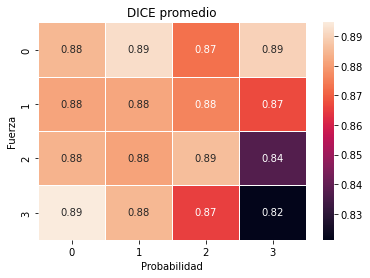

In [51]:
ax = sns.heatmap(dice_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE promedio')
#xtickslabels

plt.show()

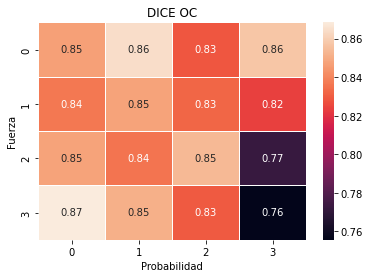

In [49]:
ax = sns.heatmap(oc_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE OC')

plt.show()

# Heatmap de la etapa 1


In [33]:
txt = 'new_DRISHTI_S1_400.txt'
name = []
loss = []
dice_avg = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l, avg_d = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    l = (l.split(':')[1]).replace('}]\n','')
    loss.append(float(l))
print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')

['DRISHTI_f-10_p-10_400 ', 'DRISHTI_f-10_p-25_400 ', 'DRISHTI_f-10_p-50_400 ', 'DRISHTI_f-25_p-10_400 ', 'DRISHTI_f-25_p-25_400 ', 'DRISHTI_f-25_p-50_400 ', 'DRISHTI_f-50_p-10_400 ', 'DRISHTI_f-50_p-25_400 ', 'DRISHTI_f-50_p-50_400 '] 

[0.015477868728339672, 0.01204482652246952, 0.016830988228321075, 0.008631098084151745, 0.011681944131851196, 0.013194577768445015, 0.012097750790417194, 0.008645648136734962, 0.007424889598041773] 

[0.9053202416224158, 0.9257193419767006, 0.8981449706041108, 0.9308427074377701, 0.9250678329086627, 0.9051273376239027, 0.9117257391653031, 0.9288171242763754, 0.9463987795615569] 



In [34]:


fuerza = [10,25,50]
prob = [10,25,50]

loss_mat = np.zeros((3,3))
dice_mat = np.zeros((3,3))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)

[[0.90532024 0.92571934 0.89814497]
 [0.93084271 0.92506783 0.90512734]
 [0.91172574 0.92881712 0.94639878]]


In [13]:
txt = 'drishti_etapa1_val_matrix.txt' #OLD
name = []
loss = []
dice_avg = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    l = (l.split(':')[1]).replace('}]\n','')
    loss.append(float(l))
print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')

['DRISHTI_augm_f-10_p-10 ', 'DRISHTI_augm_f-10_p-25 ', 'DRISHTI_augm_f-10_p-50 ', 'DRISHTI_augm_f-10_p-75 ', 'DRISHTI_augm_f-25_p-10 ', 'DRISHTI_augm_f-25_p-25 ', 'DRISHTI_augm_f-25_p-50 ', 'DRISHTI_augm_f-25_p-75 ', 'DRISHTI_augm_f-50_p-10 ', 'DRISHTI_augm_f-50_p-25 ', 'DRISHTI_augm_f-50_p-50 ', 'DRISHTI_augm_f-50_p-75 ', 'DRISHTI_augm_f-75_p-10 ', 'DRISHTI_augm_f-75_p-25 ', 'DRISHTI_augm_f-75_p-50 ', 'DRISHTI_augm_f-75_p-75 '] 

[0.013126589357852936, 0.01271850150078535, 0.01077883318066597, 0.015358026139438152, 0.015299543738365173, 0.013217130675911903, 0.01388532668352127, 0.014742945320904255, 0.009913768619298935, 0.011896814219653606, 0.01470374595373869, 0.012851744890213013, 0.015983402729034424, 0.01072628516703844, 0.015633083879947662, 0.0174972303211689] 

[0.9086440888569809, 0.9088057177150963, 0.91574192828863, 0.8951466810869271, 0.8974952245150527, 0.9024890270917322, 0.8923872516106913, 0.9017020208730052, 0.9280955998363817, 0.916526285216381, 0.8974451675102435,

In [14]:
fuerza = [10,25,50,75]
prob = [10,25,50,75]

loss_mat_OLD = np.zeros((4,4))
dice_mat_OLD = np.zeros((4,4))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat_OLD[f,p] = loss[pos]
        dice_mat_OLD[f,p] = dice_avg[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat_OLD)

[[0.90864409 0.90880572 0.91574193 0.89514668]
 [0.89749522 0.90248903 0.89238725 0.90170202]
 [0.9280956  0.91652629 0.89744517 0.91351421]
 [0.89633393 0.9297758  0.90378823 0.90584599]]


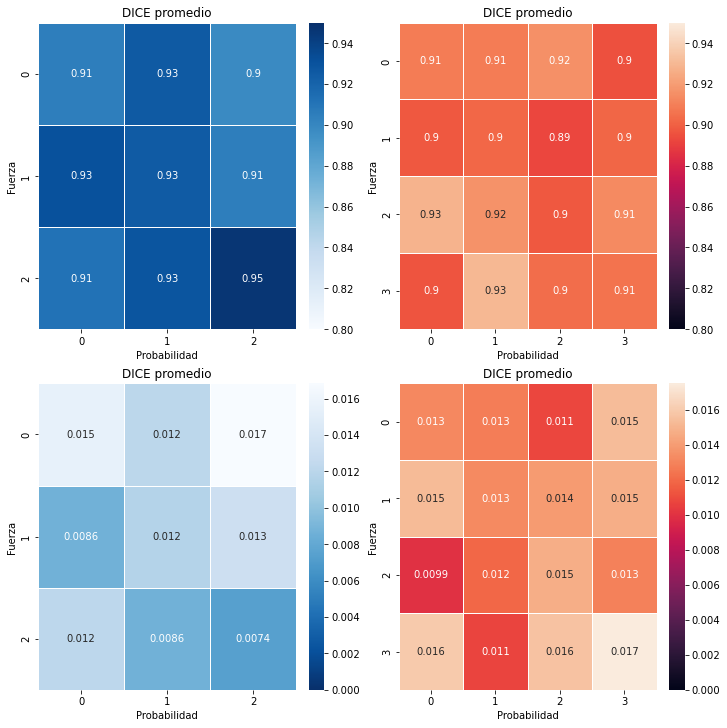

In [35]:
fig = plt.figure(constrained_layout=True, figsize=(10,10))


axs = fig.subplots(2,2)


sns.heatmap(dice_mat, annot=True, linewidth=0.5,ax=axs[0,0],vmin=0.8, vmax=0.95,cmap="Blues")
axs[0,0].set_xlabel("Probabilidad")
axs[0,0].set_ylabel("Fuerza")
axs[0,0].set_title('DICE promedio')

sns.heatmap(dice_mat_OLD, annot=True, linewidth=0.5, ax=axs[0,1],vmin=0.8, vmax=0.95)
axs[0,1].set_xlabel("Probabilidad")
axs[0,1].set_ylabel("Fuerza")
axs[0,1].set_title('DICE promedio')

sns.heatmap(loss_mat, annot=True, linewidth=0.5,ax=axs[1,0],vmin=0.0, cmap= 'Blues_r')
axs[1,0].set_xlabel("Probabilidad")
axs[1,0].set_ylabel("Fuerza")
axs[1,0].set_title('DICE promedio')

sns.heatmap(loss_mat_OLD, annot=True, linewidth=0.5, ax=axs[1,1],vmin=0.0)
axs[1,1].set_xlabel("Probabilidad")
axs[1,1].set_ylabel("Fuerza")
axs[1,1].set_title('DICE promedio')
#xtickslabels

plt.show()

# DRISHTI ETAPA 2

In [26]:
txt = 'new_DRISHTI_S2.txt'
name = []
loss = []
dice_avg = []
dice_od = []
dice_oc = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l, oc, od = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    loss.append(float(l.split(':')[1]))
    dice_oc.append(float(oc.split(':')[1]))
    dice_od.append(float((od.split(':')[1]).replace('}]','')))
print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')
print(dice_od, '\n')
print(dice_oc, '\n')

['DRISHTI_STEP2_f-10_p-10 ', 'DRISHTI_STEP2_f-10_p-25 ', 'DRISHTI_STEP2_f-10_p-50 ', 'DRISHTI_STEP2_f-25_p-10 ', 'DRISHTI_STEP2_f-25_p-25 ', 'DRISHTI_STEP2_f-25_p-50 ', 'DRISHTI_STEP2_f-50_p-10 ', 'DRISHTI_STEP2_f-50_p-25 ', 'DRISHTI_STEP2_f-50_p-50 '] 

[0.390601247549057, 0.2529675364494324, 0.23878489434719086, 0.25691428780555725, 0.244882732629776, 0.24053044617176056, 0.2151878923177719, 0.24131007492542267, 0.2325746864080429] 

[0.8885916705105149, 0.9035684517130598, 0.8928929135334313, 0.8951972367097702, 0.8954088082626604, 0.8855297085176993, 0.88895219894247, 0.8606084656925427, 0.8815734245110166] 

[0.937354523998329, 0.9486074763209034, 0.9404457198664341, 0.9467892264838433, 0.9531153337177563, 0.9530986008568465, 0.9503877840263657, 0.9067543441085997, 0.9325519760304033] 

[0.8398288170227006, 0.858529427105216, 0.8453401072004285, 0.8436052469356973, 0.8377022828075645, 0.8179608161785523, 0.8275166138585742, 0.8144625872764859, 0.8305948729916299] 



In [27]:
fuerza = [10,25,50]
prob = [10,25,50]

loss_mat = np.zeros((3,3))
dice_mat = np.zeros((3,3))
oc_mat = np.zeros((3,3))
od_mat = np.zeros((3,3))
name_mat = np.array((3,3))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        oc_mat[f,p] = dice_oc[pos]
        od_mat[f,p] = dice_od[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)

[[0.88859167 0.90356845 0.89289291]
 [0.89519724 0.89540881 0.88552971]
 [0.8889522  0.86060847 0.88157342]]


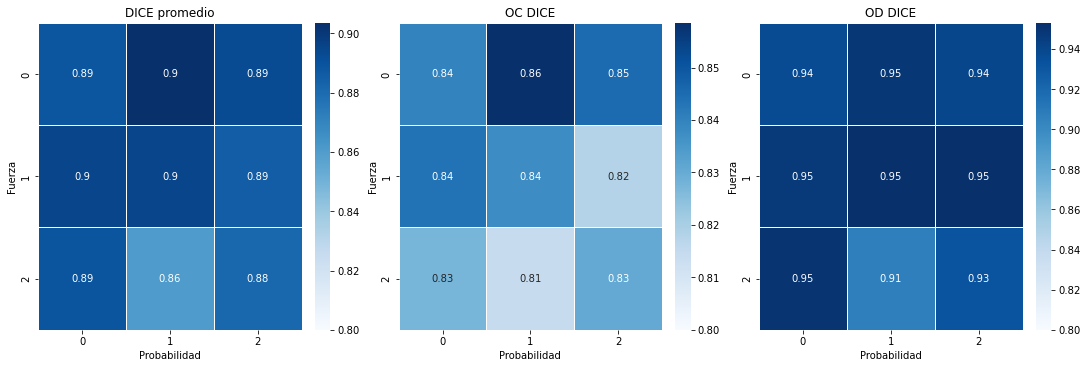

In [31]:
fig = plt.figure(constrained_layout=True, figsize=(15,5))


axs = fig.subplots(1,3)


sns.heatmap(dice_mat, annot=True, linewidth=0.5,ax=axs[0],vmin=0.8,cmap="Blues")
axs[0].set_xlabel("Probabilidad")
axs[0].set_ylabel("Fuerza")
axs[0].set_title('DICE promedio')

sns.heatmap(oc_mat, annot=True, linewidth=0.5, ax=axs[1],vmin=0.8,cmap="Blues")
axs[1].set_xlabel("Probabilidad")
axs[1].set_ylabel("Fuerza")
axs[1].set_title('OC DICE')

sns.heatmap(od_mat, annot=True, linewidth=0.5,ax=axs[2],vmin=0.8, cmap= 'Blues')
axs[2].set_xlabel("Probabilidad")
axs[2].set_ylabel("Fuerza")
axs[2].set_title('OD DICE')



plt.show()

# --------------------------------------------------------------------------------------

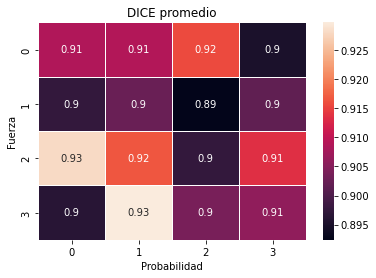

In [58]:
ax = sns.heatmap(dice_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE promedio')
#xtickslabels

plt.show()

# REFUGE STEP 1


In [2]:
txt= 'new_REFUGE_S1.txt'
name = []
loss = []
dice_avg = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l,avg_dice = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    l = (l.split(':')[1]).replace('}]\n','')
    loss.append(float(l))
print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')

['REFUGE_f-10_p-10 ', 'REFUGE_f-10_p-25 ', 'REFUGE_f-10_p-50 ', 'REFUGE_f-25_p-10 ', 'REFUGE_f-25_p-25 ', 'REFUGE_f-25_p-50 ', 'REFUGE_f-50_p-10 ', 'REFUGE_f-50_p-25 ', 'REFUGE_f-50_p-50 '] 

[0.008206703700125217, 0.005707020405679941, 0.008735953830182552, 0.008854442276060581, 0.006455735303461552, 0.006197335664182901, 0.005625342018902302, 0.005169843789190054, 0.005165266804397106] 

[0.932930885191338, 0.9339839361562708, 0.9296810714841789, 0.9306832750869648, 0.9218632966911768, 0.9361925919939398, 0.9447968429900461, 0.943942725366988, 0.9369465183997171] 



In [4]:
fuerza = [10,25,50]
prob = [10,25,50]

loss_mat = np.zeros((3,3))
dice_mat = np.zeros((3,3))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)

[[0.93293089 0.93398394 0.92968107]
 [0.93068328 0.9218633  0.93619259]
 [0.94479684 0.94394273 0.93694652]]


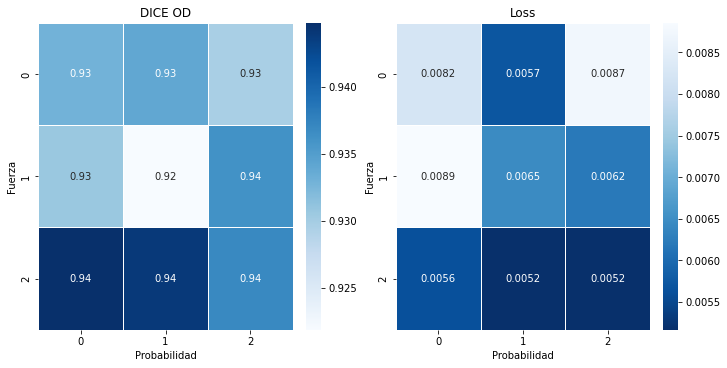

In [11]:
fig = plt.figure(constrained_layout=True, figsize=(10,5))


ax = fig.subplots(1,2)
plt.setp(ax, xticks=prob,
        yticks=fuerza)

sns.heatmap(dice_mat, annot=True, linewidth=0.5,cmap= 'Blues', ax=ax[0])
ax[0].set_xlabel("Probabilidad")
ax[0].set_ylabel("Fuerza")
ax[0].set_title('DICE OD')
#xtickslabels

sns.heatmap(loss_mat, annot=True, linewidth=0.5,cmap= 'Blues_r', ax=ax[1])
ax[1].set_xlabel("Probabilidad")
ax[1].set_ylabel("Fuerza")
ax[1].set_title('Loss')

plt.show()

# REFUGE STEP 2


In [12]:
txt = 'REFUGE_AUGM_S2.txt'
name = []
loss = []
dice_avg = []
dice_od = []
dice_oc = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l, oc, od = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    loss.append(float(l.split(':')[1]))
    dice_oc.append(float(oc.split(':')[1]))
    dice_od.append(float((od.split(':')[1]).replace('}]','')))

dice_avg.insert(10,0.0)
loss.insert(10,0.0)
dice_oc.insert(10,0.0)
dice_od.insert(10,0.0)

dice_avg.insert(12,0.0)
loss.insert(12,0.0)
dice_oc.insert(12,0.0)
dice_od.insert(12,0.0)

dice_avg.insert(13,0.0)
loss.insert(13,0.0)
dice_oc.insert(13,0.0)
dice_od.insert(13,0.0)

dice_avg.insert(14,0.0)
loss.insert(14,0.0)
dice_oc.insert(14,0.0)
dice_od.insert(14,0.0)

dice_avg.insert(15,0.0)
loss.insert(15,0.0)
dice_oc.insert(15,0.0)
dice_od.insert(15,0.0)

print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')
print(dice_od, '\n')
print(dice_oc, '\n')

['DC_REFUGE_augm_f-10_p-10 ', 'DC_REFUGE_augm_f-10_p-25 ', 'DC_REFUGE_augm_f-10_p-50 ', 'DC_REFUGE_augm_f-10_p-75 ', 'DC_REFUGE_augm_f-25_p-10 ', 'DC_REFUGE_augm_f-25_p-25 ', 'DC_REFUGE_augm_f-25_p-50 ', 'DC_REFUGE_augm_f-25_p-75 ', 'DC_REFUGE_augm_f-50_p-10 ', 'DC_REFUGE_augm_f-50_p-25 ', 'DC_REFUGE_augm_f-50_p-75 '] 

[0.23815207183361053, 0.2011643499135971, 0.19226647913455963, 0.18379077315330505, 0.17025145888328552, 0.14967024326324463, 0.12186571955680847, 0.1269254833459854, 0.4564001262187958, 0.14670290052890778, 0.0, 0.1451556384563446, 0.0, 0.0, 0.0, 0.0] 

[0.8930995347946299, 0.908339508278091, 0.911893197383628, 0.9118211589125821, 0.9156732389413732, 0.9240788659241735, 0.9397005541616938, 0.9370126857545674, 0.7279030623426, 0.9267776128700023, 0.0, 0.9274807648429766, 0.0, 0.0, 0.0, 0.0] 

[0.9312863366008354, 0.9438327216945558, 0.943401561051748, 0.934856846182615, 0.9353755495155066, 0.9563130635981986, 0.9610296246909624, 0.9598460075098493, 0.808450989409167, 0.

In [13]:
fuerza = [10,25,50]
prob = [10,25,50]

loss_mat = np.zeros((3,3))
dice_mat = np.zeros((3,3))
oc_mat = np.zeros((3,3))
od_mat = np.zeros((3,3))
name_mat = np.array((3,3))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        oc_mat[f,p] = dice_oc[pos]
        od_mat[f,p] = dice_od[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)

[[0.89309953 0.90833951 0.9118932 ]
 [0.91182116 0.91567324 0.92407887]
 [0.93970055 0.93701269 0.72790306]]


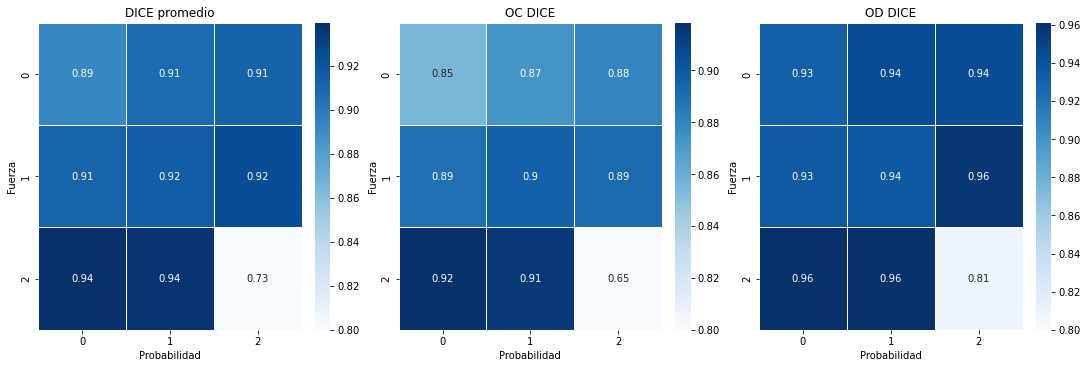

In [15]:
fig = plt.figure(constrained_layout=True, figsize=(15,5))


axs = fig.subplots(1,3)


sns.heatmap(dice_mat, annot=True, linewidth=0.5,ax=axs[0],vmin=0.8,cmap="Blues")
axs[0].set_xlabel("Probabilidad")
axs[0].set_ylabel("Fuerza")
axs[0].set_title('DICE promedio')

sns.heatmap(oc_mat, annot=True, linewidth=0.5, ax=axs[1],vmin=0.8,cmap="Blues")
axs[1].set_xlabel("Probabilidad")
axs[1].set_ylabel("Fuerza")
axs[1].set_title('OC DICE')

sns.heatmap(od_mat, annot=True, linewidth=0.5,ax=axs[2],vmin=0.8, cmap= 'Blues')
axs[2].set_xlabel("Probabilidad")
axs[2].set_ylabel("Fuerza")
axs[2].set_title('OD DICE')



plt.show()

# MULTIDATASET STEP 1


In [16]:
txt= 'new_MULTID_S1.txt'
name = []
loss = []
dice_avg = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l,avg_dice = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    l = (l.split(':')[1]).replace('}]\n','')
    loss.append(float(l))
print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')

['MULTID_f-10_p-10 ', 'MULTID_f-10_p-25 ', 'MULTID_f-10_p-50 ', 'MULTID_f-25_p-10 ', 'MULTID_f-25_p-25 ', 'MULTID_f-25_p-50 ', 'MULTID_f-50_p-10 ', 'MULTID_f-50_p-25 ', 'MULTID_f-50_p-50 '] 

[0.010062086395919323, 0.007122321054339409, 0.005997475236654282, 0.008331785909831524, 0.007427816744893789, 0.006107879802584648, 0.007958278991281986, 0.006701256148517132, 0.005740356165915728] 

[0.9487532768163035, 0.9500573177960875, 0.9550283098341603, 0.9503563145517945, 0.953353447950313, 0.956665251872153, 0.952744490062057, 0.9549437520249965, 0.9563061251407579] 



In [18]:
fuerza = [10,25,50]
prob = [10,25,50]

loss_mat = np.zeros((3,3))
dice_mat = np.zeros((3,3))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)


[[0.94875328 0.95005732 0.95502831]
 [0.95035631 0.95335345 0.95666525]
 [0.95274449 0.95494375 0.95630613]]


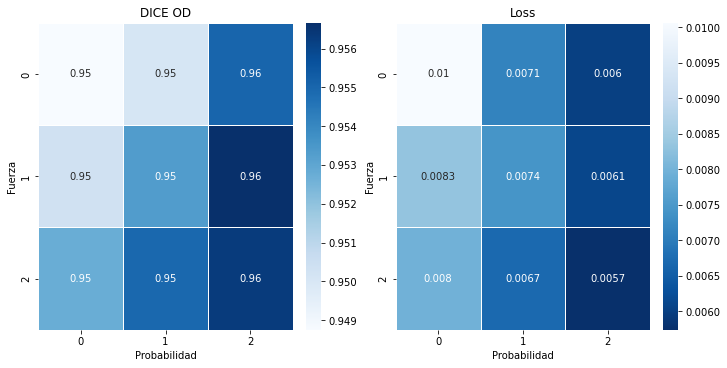

In [19]:
fig = plt.figure(constrained_layout=True, figsize=(10,5))


ax = fig.subplots(1,2)
plt.setp(ax, xticks=prob,
        yticks=fuerza)

sns.heatmap(dice_mat, annot=True, linewidth=0.5,cmap= 'Blues', ax=ax[0])
ax[0].set_xlabel("Probabilidad")
ax[0].set_ylabel("Fuerza")
ax[0].set_title('DICE OD')
#xtickslabels

sns.heatmap(loss_mat, annot=True, linewidth=0.5,cmap= 'Blues_r', ax=ax[1])
ax[1].set_xlabel("Probabilidad")
ax[1].set_ylabel("Fuerza")
ax[1].set_title('Loss')

plt.show()

# MULTIDATASET STEP 2


In [31]:
txt = 'MULTI_AUGM_S2.txt'
name = []
loss = []
dice_avg = []
dice_od = []
dice_oc = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l, oc, od = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    loss.append(float(l.split(':')[1]))
    dice_oc.append(float(oc.split(':')[1]))
    dice_od.append(float((od.split(':')[1]).replace('}]','')))

dice_avg.insert(8,0.0)
loss.insert(8,0.0)
dice_oc.insert(8,0.0)
dice_od.insert(8,0.0)

dice_avg.insert(12,0.0)
loss.insert(12,0.0)
dice_oc.insert(12,0.0)
dice_od.insert(12,0.0)

dice_avg.insert(13,0.0)
loss.insert(13,0.0)
dice_oc.insert(13,0.0)
dice_od.insert(13,0.0)

dice_avg.insert(14,0.0)
loss.insert(14,0.0)
dice_oc.insert(14,0.0)
dice_od.insert(14,0.0)

dice_avg.insert(15,0.0)
loss.insert(15,0.0)
dice_oc.insert(15,0.0)
dice_od.insert(15,0.0)

print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')
print(dice_od, '\n')
print(dice_oc, '\n')

['Step2_multi_augm_f-10_p-10 ', 'Step2_multi_augm_f-10_p-25 ', 'Step2_multi_augm_f-10_p-50 ', 'Step2_multi_augm_f-10_p-75 ', 'Step2_multi_augm_f-25_p-10 ', 'Step2_multi_augm_f-25_p-25 ', 'Step2_multi_augm_f-25_p-50 ', 'Step2_multi_augm_f-25_p-75 ', 'Step2_multi_augm_f-50_p-25 ', 'Step2_multi_augm_f-50_p-50 ', 'Step2_multi_augm_f-50_p-75 '] 

[0.12418945878744125, 0.15683822333812714, 0.1148814931511879, 0.10509036481380463, 0.11017058044672012, 0.11596892774105072, 0.0991385206580162, 0.10386061668395996, 0.0, 0.11023818701505661, 0.10688504576683044, 0.10736790299415588, 0.0, 0.0, 0.0, 0.0] 

[0.944845061782041, 0.9422439645561755, 0.9451601623636872, 0.9447456332416216, 0.9465212704434961, 0.9485335613206113, 0.9508237013535975, 0.9508978770534278, 0.0, 0.949859896662741, 0.950861287911501, 0.9488427240597963, 0.0, 0.0, 0.0, 0.0] 

[0.9670480967824472, 0.9639874941749511, 0.9674667228803903, 0.9683424016639552, 0.9664898617738392, 0.965726127475802, 0.9693987497209177, 0.967478544733

In [32]:
fuerza = [10,25,50,75]
prob = [10,25,50,75]

loss_mat = np.zeros((4,4))
dice_mat = np.zeros((4,4))
oc_mat = np.zeros((4,4))
od_mat = np.zeros((4,4))
name_mat = np.array((4,4))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        oc_mat[f,p] = dice_oc[pos]
        od_mat[f,p] = dice_od[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)

[[0.94484506 0.94224396 0.94516016 0.94474563]
 [0.94652127 0.94853356 0.9508237  0.95089788]
 [0.         0.9498599  0.95086129 0.94884272]
 [0.         0.         0.         0.        ]]


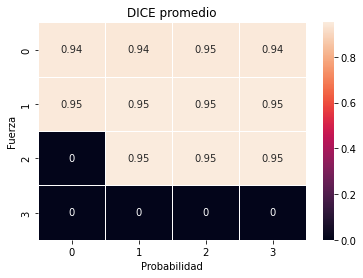

In [33]:
ax = sns.heatmap(dice_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE promedio')
#xtickslabels

plt.show()

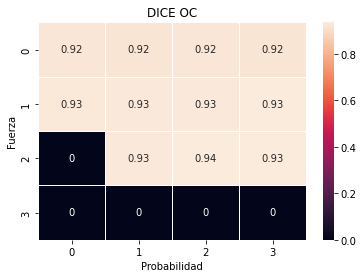

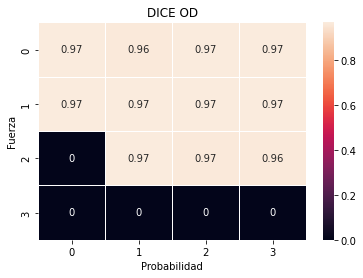

In [35]:
ax = sns.heatmap(oc_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE OC')

plt.show()

ax = sns.heatmap(od_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE OD')

plt.show()